In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import missingno as msno

In [118]:
data = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\jupyter prac\clean_resume_data.csv\clean_resume_data.csv")
data.head(6)

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
5,11592605,HR,hr generalist summary dedicated focused admini...


In [119]:
data.shape

(2484, 3)

In [120]:
data.info

<bound method DataFrame.info of             ID  Category                                            Feature
0     16852973        HR  hr administrator marketing associate hr admini...
1     22323967        HR  hr specialist hr operations summary media prof...
2     33176873        HR  hr director summary years experience recruitin...
3     27018550        HR  hr specialist summary dedicated driven dynamic...
4     17812897        HR  hr manager skill highlights hr skills hr depar...
...        ...       ...                                                ...
2479  99416532  AVIATION  rank sgt e non commissioned officer charge bri...
2480  24589765  AVIATION  government relations communications organizati...
2481  31605080  AVIATION  geek squad agent professional profile support ...
2482  21190805  AVIATION  program director office manager summary highly...
2483  37473139  AVIATION  storekeeper ii professional summary purpose do...

[2484 rows x 3 columns]>

In [121]:
data.columns.values

array(['ID', 'Category', 'Feature'], dtype=object)

In [122]:
data.dtypes

ID           int64
Category    object
Feature     object
dtype: object

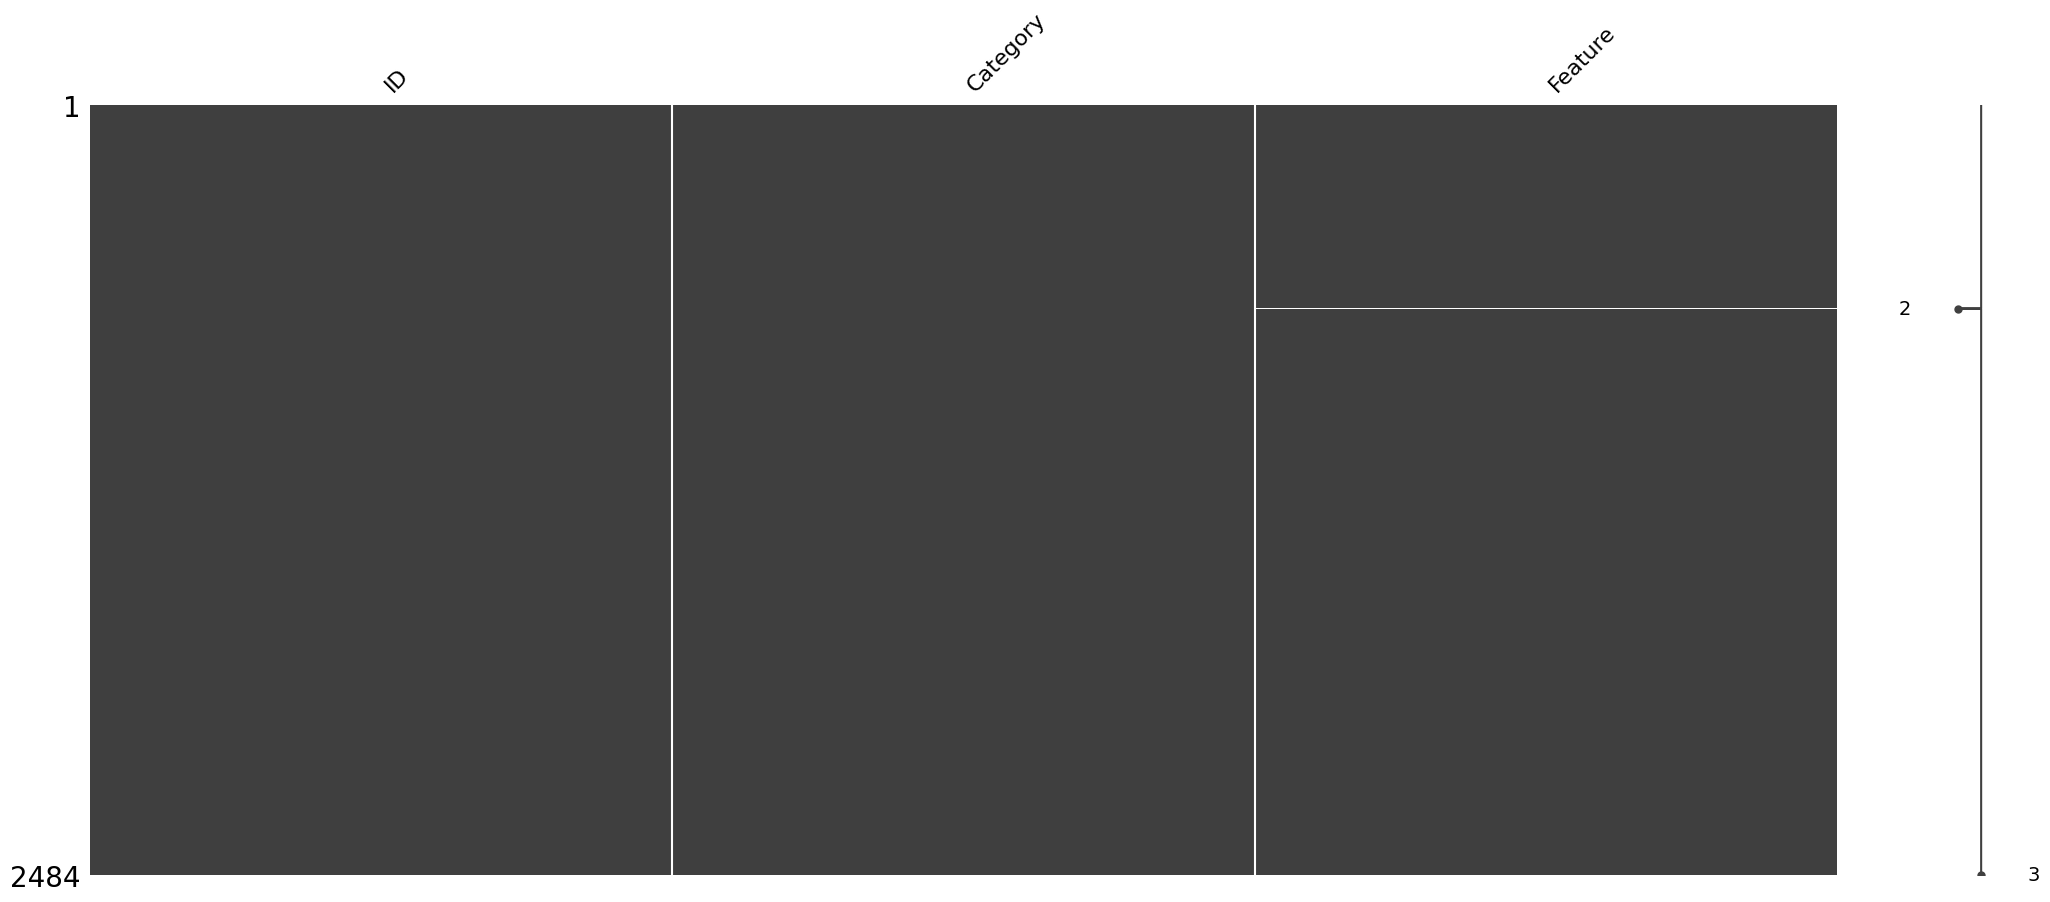

In [123]:
msno.matrix(data);

In [124]:
data["Feature"] = data["Feature"].fillna(0)
data.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

In [125]:
data = data.drop_duplicates()
data

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,99416532,AVIATION,rank sgt e non commissioned officer charge bri...
2480,24589765,AVIATION,government relations communications organizati...
2481,31605080,AVIATION,geek squad agent professional profile support ...
2482,21190805,AVIATION,program director office manager summary highly...


In [126]:
data["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

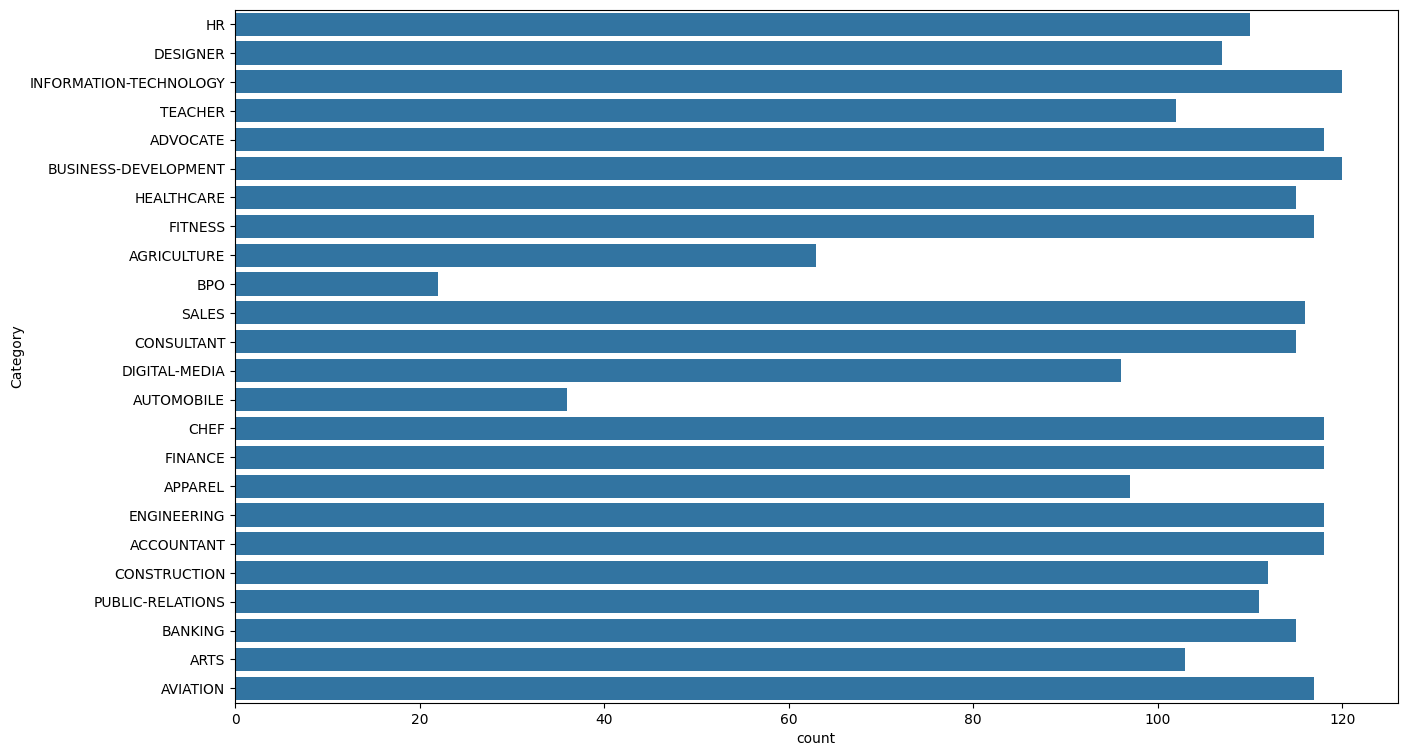

In [127]:
plt.figure(figsize=(15,9))
sns.countplot(data["Category"])
plt.show

In [128]:
from sklearn.utils import resample

In [129]:
max_count = data["Category"].value_counts().max()
balanced_data = []
for category in data["Category"].unique():
    category_data = data[data["Category"]==category]
    if len(category_data) < max_count:
        #apply  oversampling means allow duplicate values for touch the max number
        balanced_category_data = resample(category_data,replace=True,n_samples=max_count,random_state=42)
    elif len(category_data) == max_count:
        #apply undersampling means not allow duplicate like if we have max 120 rows then not adjust if it less then it can be adjust to reach it 
        balanced_category_data = resample(category_data,replace=False,n_samples=max_count,random_state=42)
    balanced_data.append(balanced_category_data)    
        
balanced_df = pd.concat(balanced_data)        

In [130]:
balanced_df["Category"].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [131]:
x = balanced_df["Feature"]
y = balanced_df["Category"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [132]:
x_train.apply(type).value_counts()

Feature
<class 'str'>    2304
Name: count, dtype: int64

In [133]:
x_test.apply(type).value_counts()

Feature
<class 'str'>    575
<class 'int'>      1
Name: count, dtype: int64

In [134]:
y_train.apply(type).value_counts()

Category
<class 'str'>    2304
Name: count, dtype: int64

In [135]:
y_test.apply(type).value_counts()

Category
<class 'str'>    576
Name: count, dtype: int64

In [136]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)
y_test = y_test.astype(str)
y_train = y_train.astype(str)

In [137]:
tfidf = TfidfVectorizer()
xtrain_vect = tfidf.fit_transform(x_train)
xtest_vect = tfidf.transform(x_test)
xtest_vect


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 181935 stored elements and shape (576, 29916)>

In [138]:
model = RandomForestClassifier()
model.fit(xtrain_vect,y_train)

RandomForestClassifier()

In [139]:
from sklearn.metrics import classification_report
pred = model.predict(xtest_vect)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8454861111111112

In [140]:
print(classification_report(y_test,pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.95      0.86        20
              ADVOCATE       0.84      0.72      0.78        29
           AGRICULTURE       0.95      0.91      0.93        23
               APPAREL       0.73      0.73      0.73        22
                  ARTS       1.00      0.67      0.80        24
            AUTOMOBILE       1.00      0.68      0.81        19
              AVIATION       0.93      0.96      0.95        28
               BANKING       0.88      0.64      0.74        22
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.44      0.44      0.44        18
                  CHEF       0.90      1.00      0.95        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       0.93      0.87      0.90        31
              DESIGNER       0.89      0.89      0.89        28
         DIGITAL-MEDIA       0.78      

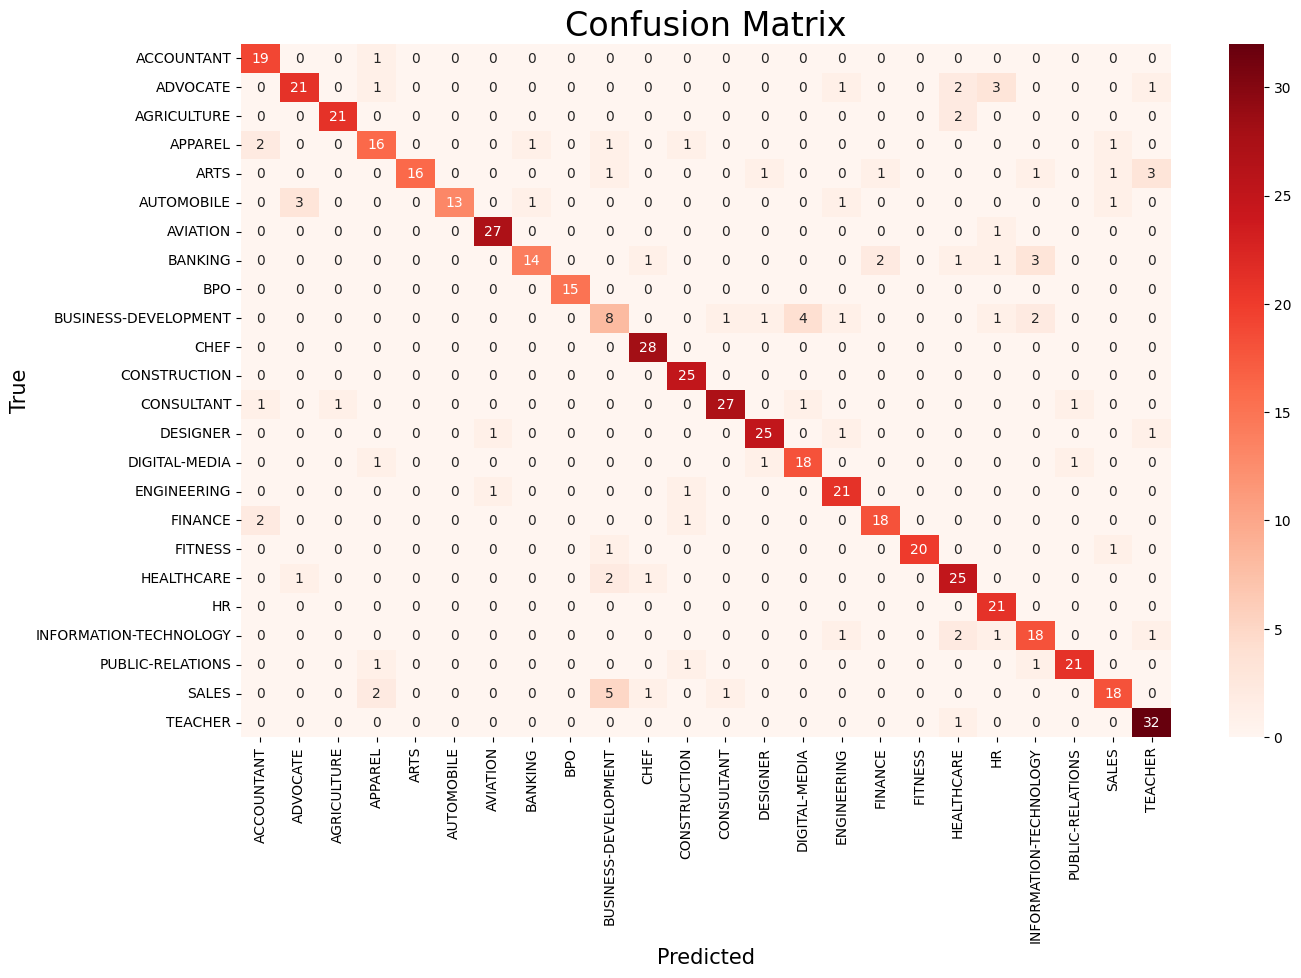

In [141]:
confus_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(15,9))
sns.heatmap(confus_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel("True",fontsize=15)
plt.title("Confusion Matrix",fontsize=24)
plt.show()



In [142]:
import re

def cleanResume(text):
    # Remove URLs
    cleantext = re.sub(r'https?://\S+\s*', ' ', text)
    # Remove digits
    cleantext = re.sub(r'\d+', ' ', cleantext)
    # Remove non-alphabetical characters except spaces
    cleantext = re.sub(r'[^a-zA-Z\s]', ' ', cleantext)
    return cleantext

# # Test input
# text1 = "Visit https://example.com or http://my-site123.org for more details! Call us at 123-456-7890."
# a = cleanResume(text1)
# print(a)

In [164]:
def predict_text(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf =  tfidf.transform([resume_text])
    predicted_category = model.predict(resume_tfidf)[0]
    return predicted_category
    

In [165]:
resume = """[Your Name]
Phone: [Your Phone Number] | Email: [Your Email Address]
LinkedIn: [LinkedIn Profile] | GitHub: [GitHub Profile]

OBJECTIVE
Motivated Computer Science student with hands-on experience in software development, coding, and problem-solving. Seeking opportunities to apply my skills in software engineering and contribute to innovative projects.

EDUCATION
B.Tech in Computer Science & Engineering
[University Name], [City] | Graduation: [Month, Year]

CGPA: [Your CGPA]
Relevant Courses: Data Structures, Algorithms, Web Development, Operating Systems, DBMS
TECHNICAL SKILLS
Languages: C, C++, Python, Java, JavaScript
Web: HTML, CSS, React, Node.js
Databases: MySQL, MongoDB
Tools: Git, Docker, Linux
Others: REST APIs, Agile, Machine Learning (basic)
PROJECTS
E-Commerce Website

Built a full-stack e-commerce site with product browsing, user login, and secure payments.
Technologies: Node.js, MongoDB, HTML/CSS
Personal Finance Tracker

Developed a Python application to track and categorize expenses.
Technologies: Python, Tkinter, SQLite
Student Grading System

Designed a system to manage and grade student assignments.
Technologies: Java, MySQL
INTERNSHIPS
Software Engineering Intern | [Company Name]
[Month, Year] – [Month, Year]

Worked on developing APIs and features for mobile apps using React Native and Node.js.
EXTRA-CURRICULARS
Member of university Coding Club
Participated in [Hackathon Name] – [Achievement]
CERTIFICATIONS
Python Developer Certificate – [Institution Name]
AWS Certified Cloud Practitioner – [Month, Year]
"""

In [166]:
category = predict_text(resume)
category

'ENGINEERING'

In [170]:
import pickle
pickle.dump(model,open("resume_classifier.pkl","wb"))

In [171]:
pickle.dump(tfidf,open("tfidf_classifier.pkl","wb"))